In [55]:
#Business Goal:
#Build a Predictive model to Classify if a business would 'Default' a loan or not

In [56]:
import pandas as pd
raw_df=pd.read_excel('/content/loan.xlsx')

In [57]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip                2096 non-null   int64  
 1   BankState          2096 non-null   object 
 2   NoEmp              2096 non-null   int64  
 3   CreateJob          2096 non-null   int64  
 4   UrbanRural         2096 non-null   object 
 5   DisbursementGross  2096 non-null   int64  
 6   New                2096 non-null   int64  
 7   RealEstate         2096 non-null   int64  
 8   Portion            2096 non-null   float64
 9   Recession          2096 non-null   int64  
 10  Default            2096 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 180.2+ KB


In [58]:
raw_df.head()

,Zip,BankState,NoEmp,CreateJob,UrbanRural,DisbursementGross,New,RealEstate,Portion,Recession,Default
0,90505,CA,1,0,UNDEFINED,30000,0,0,0.5,1,0
1,94583,NC,4,0,URBAN,17500,1,0,0.5,0,0
2,94103,NC,1,0,URBAN,17536,0,0,0.5,0,0
3,91354,IL,2,0,RURAL,30000,1,0,0.5,0,1
4,95965,NC,8,0,URBAN,30502,0,0,0.5,0,0


In [59]:
##------------------------------------------
##  Identify the Class Label or Y variable
##------------------------------------------
Y = raw_df.Default.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 2096 entries, 0 to 2095
Series name: Default
Non-Null Count  Dtype   
--------------  -----   
2096 non-null   category
dtypes: category(1)
memory usage: 2.3 KB
None


In [60]:
raw_df.columns

Index(['Zip', 'BankState', 'NoEmp', 'CreateJob', 'UrbanRural',
       'DisbursementGross', 'New', 'RealEstate', 'Portion', 'Recession',
       'Default'],
      dtype='object')

In [61]:
##-------------------------------------------------------------------
##  Select the Predictor Variables into a list called X_features
##--------------------------------------------------------------------
X_features = list( raw_df.columns )
X_features.remove( 'Default' )
X_features.remove( 'Zip' )
X_features.remove( 'BankState' )

In [62]:
print(X_features)

['NoEmp', 'CreateJob', 'UrbanRural', 'DisbursementGross', 'New', 'RealEstate', 'Portion', 'Recession']


In [63]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]

In [64]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 1467 entries, 1105 to 951
Series name: Default
Non-Null Count  Dtype   
--------------  -----   
1467 non-null   category
dtypes: category(1)
memory usage: 13.0 KB
None


In [65]:
X.select_dtypes(include='object').columns

Index(['UrbanRural'], dtype='object')

In [66]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['UrbanRural']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)



In [67]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1467 entries, 1105 to 951
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NoEmp                 1467 non-null   int64  
 1   CreateJob             1467 non-null   int64  
 2   DisbursementGross     1467 non-null   int64  
 3   New                   1467 non-null   int64  
 4   RealEstate            1467 non-null   int64  
 5   Portion               1467 non-null   float64
 6   Recession             1467 non-null   int64  
 7   UrbanRural_UNDEFINED  1467 non-null   int64  
 8   UrbanRural_URBAN      1467 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 114.6 KB


In [68]:
X_train_encoded.head()

,NoEmp,CreateJob,DisbursementGross,New,RealEstate,Portion,Recession,UrbanRural_UNDEFINED,UrbanRural_URBAN
1105,2,2,138000,0,0,0.75,0,0,0
1918,1,1,5000,0,0,0.85,0,0,1
784,5,2,83768,0,0,0.50,0,0,0
1231,5,0,807500,0,1,0.80,0,1,0
1958,1,0,500000,0,0,0.90,0,0,0


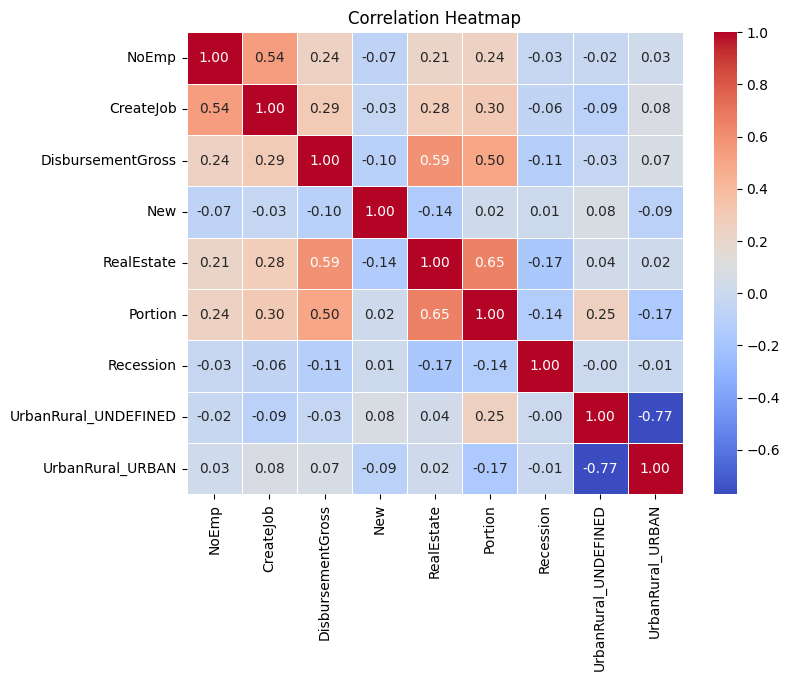

In [69]:
##-----------------------------------------------------------------------
##  2. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

In [70]:
corr_matrix

,NoEmp,CreateJob,DisbursementGross,New,RealEstate,Portion,Recession,UrbanRural_UNDEFINED,UrbanRural_URBAN
NoEmp,1.000000,0.539605,0.239754,-0.066320,0.213038,0.235945,-0.029350,-0.019900,0.026661
CreateJob,0.539605,1.000000,0.292957,-0.034239,0.277852,0.304323,-0.055285,-0.088962,0.083606
DisbursementGross,0.239754,0.292957,1.000000,-0.102395,0.587291,0.499769,-0.114316,-0.034854,0.069421
New,-0.066320,-0.034239,-0.102395,1.000000,-0.142666,0.021917,0.005794,0.078786,-0.088699
RealEstate,0.213038,0.277852,0.587291,-0.142666,1.000000,0.654700,-0.169458,0.035116,0.018742
Portion,0.235945,0.304323,0.499769,0.021917,0.654700,1.000000,-0.139932,0.248059,-0.168760
Recession,-0.029350,-0.055285,-0.114316,0.005794,-0.169458,-0.139932,1.000000,-0.000184,-0.009173
UrbanRural_UNDEFINED,-0.019900,-0.088962,-0.034854,0.078786,0.035116,0.248059,-0.000184,1.000000,-0.770772
UrbanRural_URBAN,0.026661,0.083606,0.069421,-0.088699,0.018742,-0.168760,-0.009173,-0.770772,1.000000


In [71]:
##-------------------------
##  Build the logit model
##-------------------------
import statsmodels.api as sm
##  Constant is to be added when using the sm library
X_train_encoded = sm.add_constant( X_train_encoded )
#Call Logistic regression with X and Y variables of the training data
# Model is built with the training data
logit = sm.Logit(y_train, X_train_encoded)
##  Fit the model and display results
logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.509305
         Iterations 8
                           Results: Logit
Model:               Logit             Method:            MLE       
Dependent Variable:  Default           Pseudo R-squared:  0.191     
Date:                2024-10-01 03:31  AIC:               1514.3012 
No. Observations:    1467              BIC:               1567.2109 
Df Model:            9                 Log-Likelihood:    -747.15   
Df Residuals:        1457              LL-Null:           -923.76   
Converged:           1.0000            LLR p-value:       1.2794e-70
No. Iterations:      8.0000            Scale:             1.0000    
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                 0.6165   0.3691  1.6702 0.0949 -0.1070  1.3400
NoEmp                -0.0079

In [72]:
#Only significant X-vars are used to build the predictive model
#Only significant X-vars are used to build the predictive model
#Select the significant variables

significant_vars = logit_model.pvalues[logit_model.pvalues < 0.05].index.tolist()
# Remove the constant if it's present

significant_vars = ['const','DisbursementGross', 'RealEstate', 'Portion', 'UrbanRural_UNDEFINED']
print(significant_vars)

['const', 'DisbursementGross', 'RealEstate', 'Portion', 'UrbanRural_UNDEFINED']


In [73]:
##-------------------------------------------------------
##  Revise model to include only significant predictors
##-------------------------------------------------------
#final_logit holds the logistic regression equation aka -the model
#Only significant X-vars are used to build the predictive model
final_logit_model = sm.Logit( y_train,X_train_encoded[significant_vars] ).fit()
print(final_logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.511349
         Iterations 7
                           Results: Logit
Model:               Logit             Method:            MLE       
Dependent Variable:  Default           Pseudo R-squared:  0.188     
Date:                2024-10-01 03:31  AIC:               1510.2976 
No. Observations:    1467              BIC:               1536.7525 
Df Model:            4                 Log-Likelihood:    -750.15   
Df Residuals:        1462              LL-Null:           -923.76   
Converged:           1.0000            LLR p-value:       6.9764e-74
No. Iterations:      7.0000            Scale:             1.0000    
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                 0.8323   0.2847  2.9236 0.0035  0.2743  1.3902
DisbursementGross    -0.0000

In [74]:
##----------------------------
##  Apply model on test data
##----------------------------
X_test_encoded=sm.add_constant(X_test_encoded)
#Make sure only the significant variables in the test data are selected
X_test_sig_vars=X_test_encoded[significant_vars]
X_test_sig_vars
y_prob=final_logit_model.predict(X_test_sig_vars)
#y_prob holds the probability values for each record in the test data

In [75]:
y_prob

,0
1992,0.520382
247,0.361938
69,0.519258
299,0.517389
231,0.392041
...,...
1337,0.043036
2013,0.512244
1966,0.076563
1274,0.374847


In [76]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})


In [77]:
print(y_pred_df.head())

     actual_Y  predicted_prob
1992        0        0.520382
247         0        0.361938
69          1        0.519258
299         0        0.517389
231         1        0.392041


In [78]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
1992        0        0.520382            1
247         0        0.361938            0
69          1        0.519258            1
299         0        0.517389            1
231         1        0.392041            0


In [79]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[287 132]
 [ 79 131]]


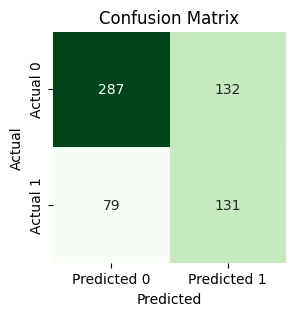

In [80]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [81]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.62
Accuracy: 0.66


In [82]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       419
           1       0.50      0.62      0.55       210

    accuracy                           0.66       629
   macro avg       0.64      0.65      0.64       629
weighted avg       0.69      0.66      0.67       629



In [83]:
#Implications/ Recommendations

In [84]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def compute_sensitivity_table(y_actual, y_prob, specific_thresholds=np.arange(0.1, 0.5, 0.01)):
    """
    This function computes and prints a table of sensitivity (TPR) values for specified thresholds (0.1 to 0.5).

    Parameters:
    y_actual: array-like
        The actual binary labels.
    y_prob: array-like
        The predicted probabilities for the positive class.
    specific_thresholds: array-like, optional
        The specific thresholds for which to compute sensitivity. Default is np.arange(0.1, 0.5, 0.01).
    """

    results = []  # List to store results for the table

    for threshold in specific_thresholds:
        # Convert predicted probabilities to binary predictions based on the threshold
        y_pred = (y_prob >= threshold).astype(int)

        # Get the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()

        # Calculate TPR (Sensitivity)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

        # Append results
        results.append({'Threshold': threshold, 'Sensitivity (TPR)': tpr})

    # Create a DataFrame for better formatting
    sensitivity_table = pd.DataFrame(results)

    # Print the sensitivity table
    print(sensitivity_table)

In [85]:
compute_sensitivity_table(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

    Threshold  Sensitivity (TPR)
0        0.10           0.952381
1        0.11           0.933333
2        0.12           0.933333
3        0.13           0.933333
4        0.14           0.933333
5        0.15           0.933333
6        0.16           0.928571
7        0.17           0.928571
8        0.18           0.923810
9        0.19           0.923810
10       0.20           0.923810
11       0.21           0.923810
12       0.22           0.923810
13       0.23           0.919048
14       0.24           0.919048
15       0.25           0.919048
16       0.26           0.919048
17       0.27           0.914286
18       0.28           0.914286
19       0.29           0.914286
20       0.30           0.904762
21       0.31           0.904762
22       0.32           0.904762
23       0.33           0.900000
24       0.34           0.900000
25       0.35           0.895238
26       0.36           0.895238
27       0.37           0.871429
28       0.38           0.861905
29       0

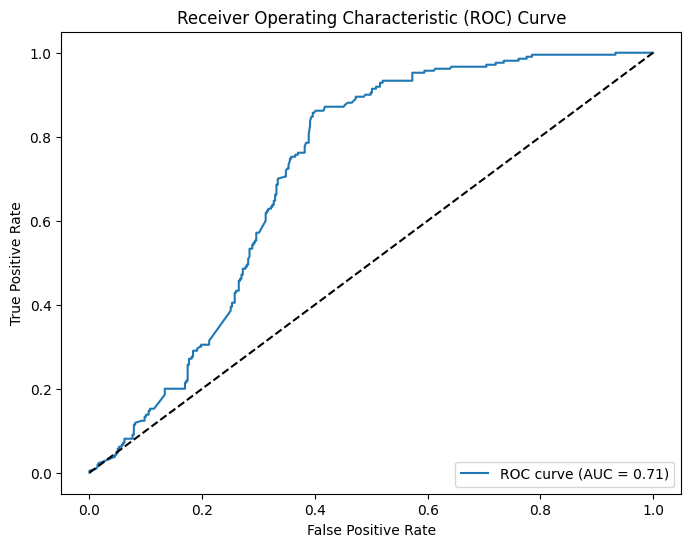

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Interpretation

## Default =1 -> Positive Class -> Class of our Interest
- Right now Sensitivity is very low = 62%
- That why the Model is not good at making the
   current Business Decision on Predicting if a business would deafult or not
- Model not recommend at 0.5 Cutoff
- We can achieve a Sensiitivity of 90% at 0.34 threshold, so it can be the recommended cutoff to build the model

## Optimising the Cutoff value

at cut-off = 0.34 we are getting 90% sensitivity

In [87]:
y_pred_df['predicted_Y_0.34_cutoff'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.34 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y  predicted_Y_0.34_cutoff
1992        0        0.520382            1                        1
247         0        0.361938            0                        1
69          1        0.519258            1                        1
299         0        0.517389            1                        1
231         1        0.392041            0                        1


In [90]:
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y_0.34_cutoff'])
print(cm)

[[214 205]
 [ 21 189]]


In [91]:
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y_0.34_cutoff'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y_0.34_cutoff'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.90
Accuracy: 0.64


In [92]:
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y_0.34_cutoff']))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.51      0.65       419
           1       0.48      0.90      0.63       210

    accuracy                           0.64       629
   macro avg       0.70      0.71      0.64       629
weighted avg       0.77      0.64      0.64       629



In [93]:
# though we are getting 90% sensisitivity, the specificity has gone down massively which is not a optimal trade -off

In [94]:
# so, we need to have a certian cut off value for which we can get a good trade -off between sensitivity and specificity

In [95]:
# checking with cut off = 0.4

In [97]:
y_pred_df['predicted_Y_0.40_cutoff'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.40 else 0)
y_pred_df.head()

,actual_Y,predicted_prob,predicted_Y,predicted_Y_0.34_cutoff,predicted_Y_0.40_cutoff
1992,0,0.520382,1,1,1
247,0,0.361938,0,1,0
69,1,0.519258,1,1,1
299,0,0.517389,1,1,1
231,1,0.392041,0,1,0


In [98]:
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y_0.40_cutoff'])
print(cm)

[[260 159]
 [ 50 160]]


In [99]:
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y_0.40_cutoff'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y_0.40_cutoff'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.76
Accuracy: 0.67


In [100]:
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y_0.40_cutoff']))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.62      0.71       419
           1       0.50      0.76      0.60       210

    accuracy                           0.67       629
   macro avg       0.67      0.69      0.66       629
weighted avg       0.73      0.67      0.68       629



# Interpretation

SO, in this final model we are able to improve the sensitivity from 62% to 76%

with a Speciificity of 62% and accuracy of 67%

So, this model can be used for predicting the High risk businesses who would default
